<a href="https://colab.research.google.com/github/Lounes-Kheris/IA-projects/blob/main/Python-For-ML-Esentially-Docs/SCIPY_Optimize%2C_Fourier%2C_NdImage_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MODULE 1 : INTERPOLATE

import numpy as np
import matplotlib.pyplot as plt


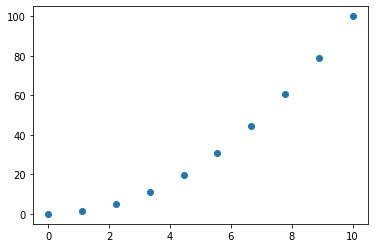

In [2]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

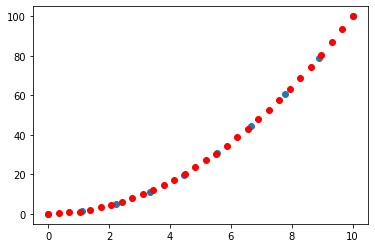

In [3]:
# placer plus de points entres les points : faire de l'interpolation
from scipy.interpolate import interp1d
#generer une autre fonction d'interpolation : nouvelle fonction

#interpolation linéaire
f = interp1d(x, y, kind='linear')

new_x = np.linspace(0,10, 30) #30points
result = f(new_x)

plt.scatter(x, y)
plt.scatter(new_x, result, c='r')

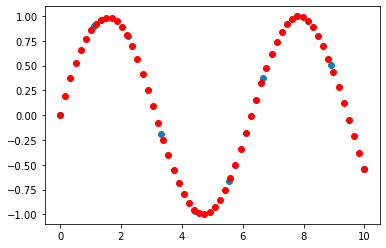

In [4]:
#Interpolation Cubique

x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

x_news = np.linspace(0, 10, 60)
f = interp1d(x, y, kind='cubic')

plt.scatter(x_news, f(x_news), c='r')

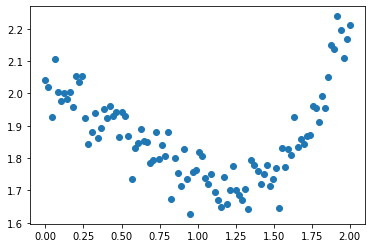

In [5]:
# MODULE 2 / OPTIMIZE
# curve fitting

x = np.linspace(0,2, 100)
y = 1/3 * x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20

plt.scatter(x, y)

In [6]:
#dev un modéle stat qui rentre dans le nuage de point

def f(x, a, b, c, d):
  return a * x**3 + b * x**2 + c * x + d

In [7]:
from scipy import optimize

params, param_cov = optimize.curve_fit(f, x, y)

#on va retrouver en resultat
  # tableau 1 : les paramétres a b c d
  # tableau 2 : matrice de covariance

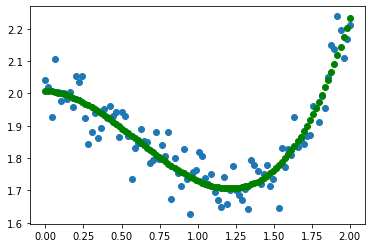

In [8]:
plt.scatter(x, y)
plt.scatter(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=1)

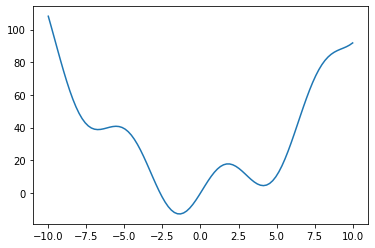

In [9]:
# FONCTION 'MINIMIZE'

def f (x):
  return x**2 + 15*np.sin(x)

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [10]:
x0 = -5

optimize.minimize(f, x0=x0)
#enregistrement du tableau de la valeur x qui est le minimum

result = optimize.minimize(f, x0=x0).x


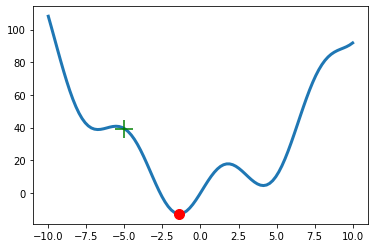

In [11]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r', zorder=1) # point de minimisation
plt.scatter(x0, f(x0), s=300, marker='+', c='g', zorder=1) # point de départ
plt.show()

[-0.78539916 -2.35619346]


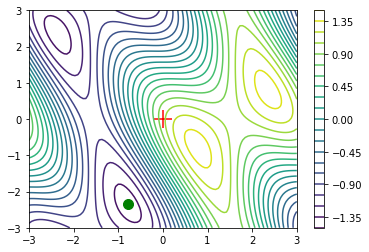

In [12]:
# minimisation en 2d

def f(x):
  return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

x, y = np.meshgrid(x, y)
plt.contour(x, y, f(np.array([x,y])), 20)
plt.colorbar()

#en 2D, on doit initialiser 2 points
x0 = np.zeros((2,1)) # 1er point (2,1)
plt.scatter(x0[0], x0[1], marker='+', s=300, c='r')

result = optimize.minimize(f, x0=x0).x
print(result)
plt.scatter(result[0], result[1], s=100, c='g')

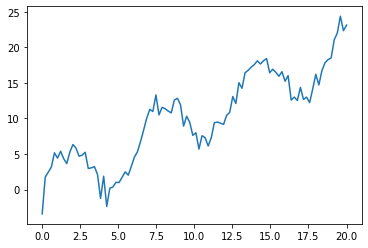

In [13]:
# Signal Processing

x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x, y)

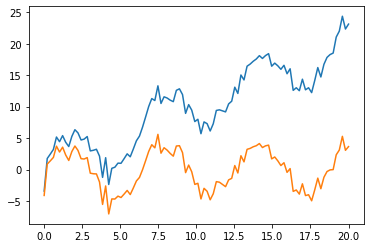

In [14]:
#eliminer toute les tendance lineaire dans un signal*

from scipy import signal
new_y = signal.detrend(y)
#plt.scatter(x, y)
plt.plot(x, y)
#plt.scatter(x, new_y)
plt.plot(x, new_y)

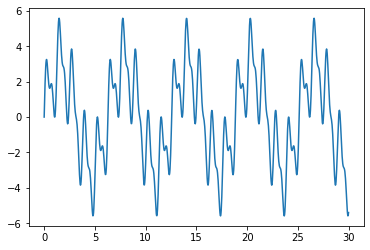

In [15]:
# TRANSFORMATION DE FOURIER
 ### permet d'extraire et d'analyser les freq qui sont presentes dans un signal periodique

x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x)

plt.plot(x, y)

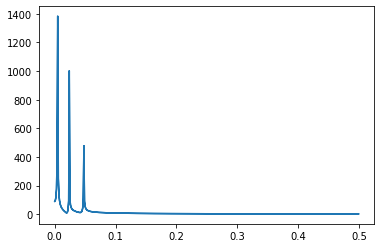

In [16]:
from scipy import fftpack

fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)

plt.plot(np.abs(frequences), np.abs(fourier))

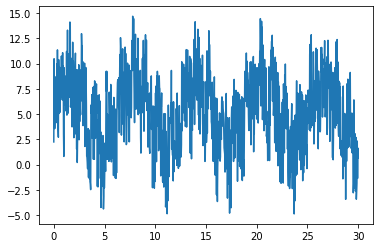

In [17]:
#application direct

x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10

plt.plot(x, y)

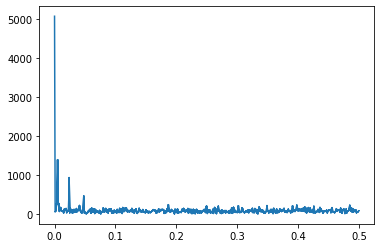

In [18]:
fourier = fftpack.fft(y)
frequences = fftpack.fftfreq(y.size)

#onva avoir le spectre suivant
plt.plot(np.abs(frequences), np.abs(fourier))

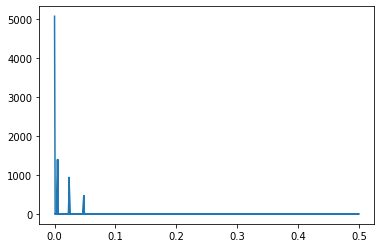

In [19]:
#filtrer le spectre

fourier[np.abs(fourier) < 400] = 0
plt.plot(np.abs(frequences), np.abs(fourier))
#new spectre : pas de bruit

In [20]:
filtred_signal = fftpack.ifft(fourier) #transformée de fourier inverse

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


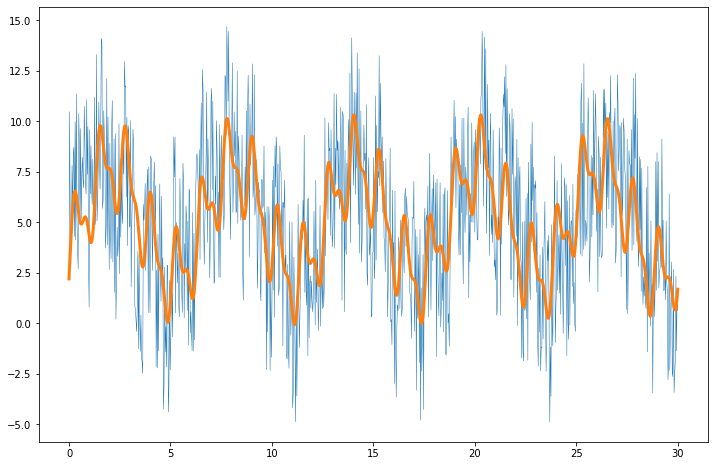

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5)
plt.plot(x, filtred_signal, lw=3)
plt.show()

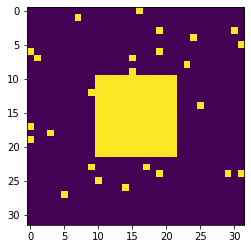

In [22]:
# TRAITEMENT D'IMAGE   : SCIPY.NDIMAGE  : SCIPY MORPHOLOGIE

from scipy import ndimage 
np.random.seed(0)
X = np.zeros((32, 32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0, 32, 30), np.random.randint(0, 32, 30)] = 1
plt.imshow(X)

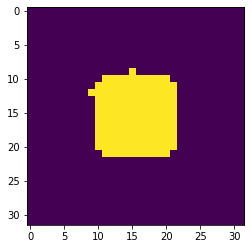

In [23]:
open_x = ndimage.binary_opening(X) #combinaison entre dilation et érosion
plt.imshow(open_x)

Saving bacteria_cell.png to bacteria_cell (2).png


(271, 288)

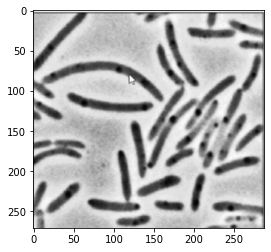

In [34]:
# exemple : with bacteria image

from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
img = cv2.imread('bacteria_cell.png')
#pas pratique de manipuler des images en 3d
#reduction en 2D
img = img[:,:,0]
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')
img.shape

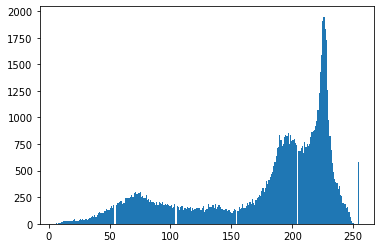

In [35]:
import numpy as np
# 1 : extraire les abctérie de l'arriére plan
img2 = np.copy(img)

plt.hist(img2.ravel(), bins=255)
plt.show()

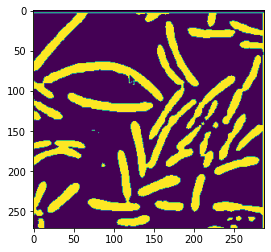

In [36]:
#pour extraire les bacterie 
# boolean indexing : sur les couleurs les plus claires
img = img < 150
plt.imshow(img)

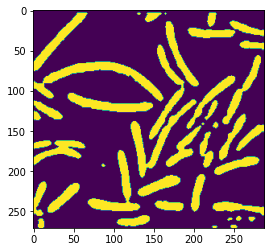

In [38]:
open_x = ndimage.binary_opening(img)
plt.imshow(open_x)

In [40]:
#label : renvois deux variable
#label_image : l'image sur laquelle on met une étiquette sur chaque bactérie
#n_labels : nbr etiquettes
label_image, n_labels = ndimage.label(open_x)
n_labels

#on 42 groupe qui ont été crée

42

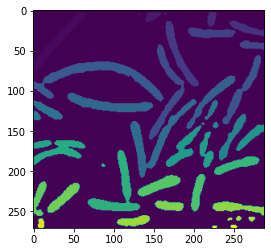

In [41]:
#visualiser les groupes
plt.imshow(label_image)

In [42]:
#sim : compter tout les pixels dans chaque groupes
#permettre de mesurer la taille de chaque bactérie
sizes = ndimage.sum(open_x, label_image, range(n_labels))
sizes

array([   0.,  975.,   11.,  162.,    5.,  154.,  366.,  811.,  556.,
        244., 1115.,  832., 1964.,  711., 1138., 1532.,  364.,  152.,
         88.,  515.,   39.,    8.,  378.,  664.,  397.,  171.,  809.,
       1293.,  564.,   14.,  450.,  642.,  375.,  546.,  349.,  563.,
        382.,   32.,   39.,   18.,   83.,   30.])

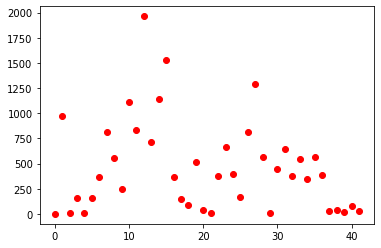

In [43]:
plt.scatter(range(n_labels), sizes, c='red')